## CBD Assignment-1

## Topic: Collecting tweets relating to stock market

## Group Members
<p style="font-size:18px">
 Sushant Giri (C0861112)<br>
 Britty Bidari (C0861113)<br>
 Jaspreet Kaur (C0861116)<br>
 Vijay Seelam (C0857329)<br>
</p>
    

In [1]:
# Importing the necessary libraries
import os
# Tweepy as a twitter client
import tweepy
import configparser
import pandas as pd
import time
import glob
from datetime import datetime

In [2]:
# API and access token acquired from the developer console
api_key = "8JRXQtOMNh0P9JEbT0JmkL1PC"
api_key_secret = "FmeMtZH1fcPc1SVQHyNvhtyKEufP7PqjpBCyWVIliV5RwlExBr"

access_token = "1541530167922794498-ulpRvGM0tr8dhmoFapLh5d6dLJd1TQ"
access_token_secret = "tRpCjoFbQKaX4qSb6u0liEKrsW6Hmy1nDMFaPYBlkJuOd"

In [3]:
# Initializing Tweepy Handler with the credentials
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
# Initializing twitter client
api = tweepy.API(auth)

In [5]:
# Keywords of the 8 stocks ventures as a list
keywords = ['Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'APPL', 'GOOG', 'YHOO']
#keywords = ['Coindesk', 'APPL', 'GOOG']

In [6]:
# Start end date params
start_date = "2022-07-03"
end_date = "2022-07-08"

In [7]:
# Searching for every keywords using tweepy Cursor and creating folder for each of them if it doesn't exists
date = datetime.now().strftime("%Y_%m_%d")
for query in keywords:
    keywords = keywords
    search_query = "#"+query+" ""-filter:retweets"
    print(search_query)
    
    search_tweets = tweepy.Cursor(api.search_tweets,
                              q=search_query,since=start_date,until=end_date,
                              lang="en").items(1000)
    ## Selected keys from the result
    columns = ['tweet id', 'time of tweet', 'user_id', 'text']
    data = []
    
    for tweet in search_tweets:
        data.append([tweet.id, tweet.created_at, tweet.user.id, tweet.text])
    
    df = pd.DataFrame(data, columns=columns)
    
    ## Check if the folder already exists or not
    if not os.path.exists(f"{query}"):
        os.makedirs(f"{query}")
        print("Created Folder : ", f"{query}")
    else:
        print("Folder already existed : ", f"{query}")
        
    directory = os.getcwd()
        
    path = f"{directory}/{query}/{query}_{date}.csv"
    
    df.to_csv(path, index=False)
    
    print(f"Created {query}_{date} csv file")
              
    #time.sleep(600)

Unexpected parameter: since


#Altcoin -filter:retweets
Folder already existed :  Altcoin


Unexpected parameter: since


Created Altcoin_2022_11_15 csv file
#Bitcoin -filter:retweets


Unexpected parameter: since


Folder already existed :  Bitcoin
Created Bitcoin_2022_11_15 csv file
#Coindesk -filter:retweets


Unexpected parameter: since


Folder already existed :  Coindesk
Created Coindesk_2022_11_15 csv file
#Cryptocurrency -filter:retweets
Folder already existed :  Cryptocurrency


Unexpected parameter: since


Created Cryptocurrency_2022_11_15 csv file
#Gold -filter:retweets


Unexpected parameter: since


Folder already existed :  Gold
Created Gold_2022_11_15 csv file
#APPL -filter:retweets
Folder already existed :  APPL


Unexpected parameter: since


Created APPL_2022_11_15 csv file
#GOOG -filter:retweets
Folder already existed :  GOOG


Unexpected parameter: since


Created GOOG_2022_11_15 csv file
#YHOO -filter:retweets
Folder already existed :  YHOO
Created YHOO_2022_11_15 csv file


# Concat

In [8]:
# Merging and joining all the generated csv
import glob
directory = os.getcwd()

for query in keywords:
    # setting the path for joining multiple files
    files = os.path.join(f"{directory}/{query}", "*.csv")

    # list of merged files returned
    files = glob.glob(files)

    print(f"Merged CSV after joining all {query} CSV files");

    # joining files with concat and read_csv
    df = pd.concat(map(pd.read_csv, files), ignore_index=True)
    
    path = f"{directory}/{query}/{query}_Merged.csv"
    df.to_csv(path, index=False)
    #print(df)

Merged CSV after joining all Altcoin CSV files
Merged CSV after joining all Bitcoin CSV files
Merged CSV after joining all Coindesk CSV files
Merged CSV after joining all Cryptocurrency CSV files
Merged CSV after joining all Gold CSV files
Merged CSV after joining all APPL CSV files
Merged CSV after joining all GOOG CSV files
Merged CSV after joining all YHOO CSV files


In [9]:
# Dataframe from each keywords by reading the csv with the parse dates
Altcoin_df = pd.read_csv('Altcoin/Altcoin_Merged.csv',parse_dates=['time of tweet'])
Bitcoin_df = pd.read_csv('Bitcoin/Bitcoin_Merged.csv',parse_dates=['time of tweet'])
Coindesk_df = pd.read_csv('Coindesk/Coindesk_Merged.csv',parse_dates=['time of tweet'])
Cryptocurrency_df = pd.read_csv('Cryptocurrency/Cryptocurrency_Merged.csv',parse_dates=['time of tweet'])
Gold_df = pd.read_csv('Gold/Gold_Merged.csv',parse_dates=['time of tweet'])
APPL_df = pd.read_csv('APPL/APPL_Merged.csv',parse_dates=['time of tweet'])
GOOG_df = pd.read_csv('GOOG/GOOG_Merged.csv',parse_dates=['time of tweet'])
YHOO_df = pd.read_csv('YHOO/YHOO_Merged.csv',parse_dates=['time of tweet'])

# Exploratory Data Analysis

In [10]:
# Dropping the duplicates
Altcoin_df.drop_duplicates(inplace=True)
Bitcoin_df.drop_duplicates(inplace=True)
Coindesk_df.drop_duplicates(inplace=True)
Cryptocurrency_df.drop_duplicates(inplace=True)
Gold_df.drop_duplicates(inplace=True)
APPL_df.drop_duplicates(inplace=True)
GOOG_df.drop_duplicates(inplace=True)
YHOO_df.drop_duplicates(inplace=True)

In [11]:
# Function implementing text cleaning functionalities such as punctuations, digit etc.
import re
def textCleaning(text):
    
    # Removing @, # and punctuations from the text
    text = ' '.join(re.sub("(@)|([^0-9A-Za-z# \t])|(\w+:\/\/\S+)"," ",text).split())
    
    # Removing Digits
    text = re.sub(r"\d", "", text)
    
    # remove words with length less than 2
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # removing new line from the tweet
    text = re.sub('\n', '', text)
    
    text = text.strip()
    
    return text

In [12]:
# Applying the cleaning function on each of the data frame
Altcoin_df['clean_text'] = Altcoin_df['text'].apply(textCleaning)
Bitcoin_df['clean_text'] = Bitcoin_df['text'].apply(textCleaning)
Coindesk_df['clean_text'] = Coindesk_df['text'].apply(textCleaning)
Cryptocurrency_df['clean_text'] = Cryptocurrency_df['text'].apply(textCleaning)
Gold_df['clean_text'] = Gold_df['text'].apply(textCleaning)
APPL_df['clean_text'] = APPL_df['text'].apply(textCleaning)
GOOG_df['clean_text'] = GOOG_df['text'].apply(textCleaning)
YHOO_df['clean_text'] = YHOO_df['text'].apply(textCleaning)

In [13]:
# Printing the first 5 rows of the dataset of Altcoin
Altcoin_df.head()

,tweet id,time of tweet,user id,text,user_id,clean_text
0,1543777570675638277,2022-07-04 02:03:49+00:00,1.568228e+09,Shill me your #altcoin ready to moon🚀,NaN,Shill your #altcoin ready moon
1,1543777484361109504,2022-07-04 02:03:28+00:00,1.397481e+18,[⭐️🔵 NEW LISTING⭐️]\n[TRIVIA] BEING LISTED IN ...,NaN,NEW LISTING TRIVIA BEING LISTED COINMARKETCAP...
2,1543777467453906945,2022-07-04 02:03:24+00:00,1.397481e+18,[⭐️🔵 NEW LISTING⭐️]\n[GTFX] BEING LISTED IN CO...,NaN,NEW LISTING GTFX BEING LISTED COINMARKETCAP S...
3,1543777446205558784,2022-07-04 02:03:19+00:00,1.397481e+18,[⭐️🔵 NEW LISTING⭐️]\n[WSI] BEING LISTED IN COI...,NaN,NEW LISTING WSI BEING LISTED COINMARKETCAP SU...
4,1543777428732010497,2022-07-04 02:03:15+00:00,1.397481e+18,[⭐️🔵 NEW LISTING⭐️]\n[MCOS] BEING LISTED IN CO...,NaN,NEW LISTING MCOS BEING LISTED COINMARKETCAP S...


# Data Visualization

In [14]:
# Grouping the dataframe based time of tweet and plotting the tweets on a daily basis.
import matplotlib.pyplot as plt
import numpy as np
def DailyTweets(title,d):
     
    d = pd.DataFrame(d.groupby(pd.Grouper(key='time of tweet', axis=0, freq='D')).count()['user id'])
    
    print(f"The daily number of tweets for {title} is shown in the graph below: ")
    
    fig, ax = plt.subplots(figsize=(7,5))
    d.columns = d.columns.str.replace(' ','_')
    d.user_id.plot.bar()   
    plt.xticks(np.arange(0,len(d),1).tolist(),[str(i)[:10] for i in d.index ], rotation=30, horizontalalignment="center")
    plt.xlabel("Days")
    plt.ylabel("Number of tweets")
    plt.title(title)
    for bars in ax.containers:
        ax.bar_label(bars)
    print('-'*100)
    plt.show()

The daily number of tweets for #Altcoin is shown in the graph below: 
----------------------------------------------------------------------------------------------------


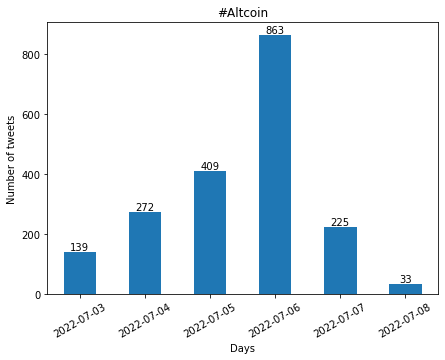

The daily number of tweets for #Bitcoin is shown in the graph below: 
----------------------------------------------------------------------------------------------------


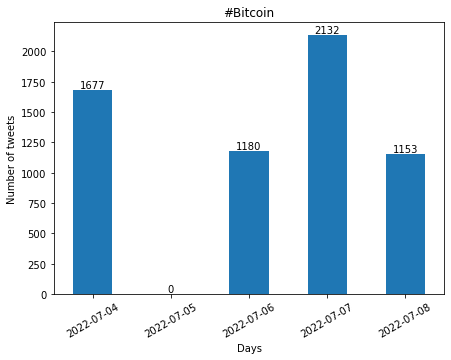

The daily number of tweets for Coindesk is shown in the graph below: 
----------------------------------------------------------------------------------------------------


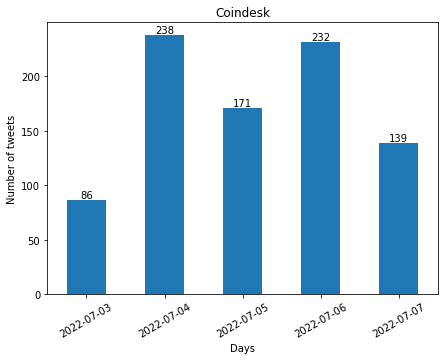

The daily number of tweets for Cryptocurrency is shown in the graph below: 
----------------------------------------------------------------------------------------------------


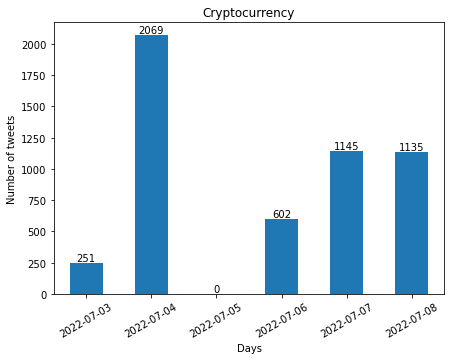

The daily number of tweets for Gold is shown in the graph below: 
----------------------------------------------------------------------------------------------------


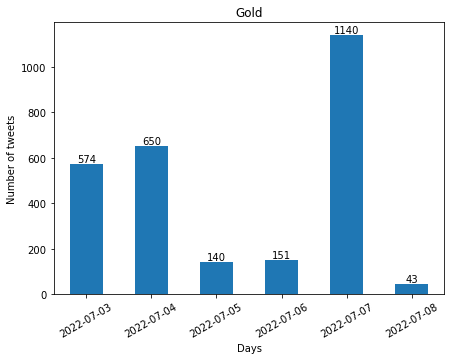

The daily number of tweets for APPL is shown in the graph below: 
----------------------------------------------------------------------------------------------------


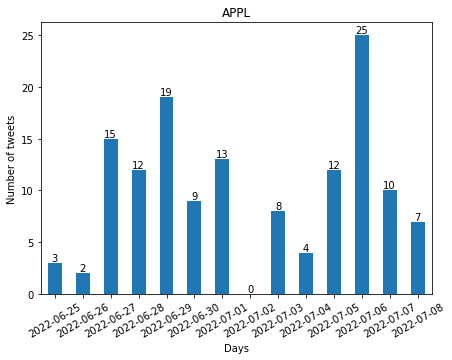

The daily number of tweets for GOOG is shown in the graph below: 
----------------------------------------------------------------------------------------------------


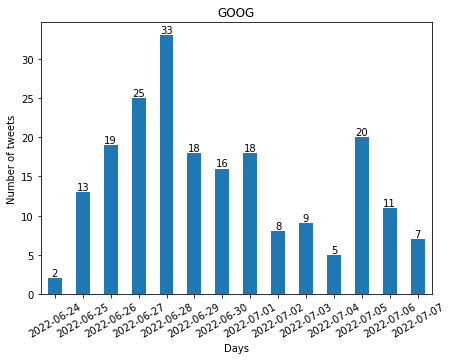

The daily number of tweets for YHOO is shown in the graph below: 
----------------------------------------------------------------------------------------------------


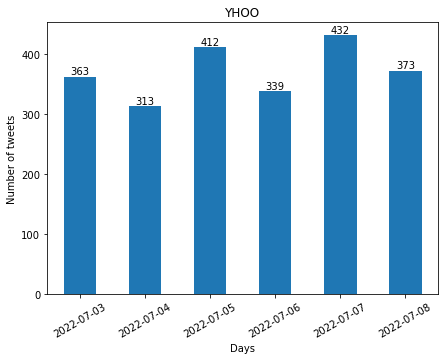

In [15]:
# Implementing the daily number of tweets for all the keywords
key_value = [['#Altcoin',Altcoin_df],['#Bitcoin',Bitcoin_df],['Coindesk',Coindesk_df],['Cryptocurrency',Cryptocurrency_df],['Gold',Gold_df],['APPL',APPL_df],['GOOG',GOOG_df],['YHOO',YHOO_df]]
for i in range(8):
    DailyTweets(key_value[i][0],key_value[i][1])

In [16]:
# Function of grouping the tweets based on time on a daily basis and plotting the days with the number of users.
def dailyUsers(title,d):
    d['time of tweet'] = d['time of tweet'].apply(lambda x: str(x)[0:10])
    d = pd.DataFrame(d.groupby('time of tweet')['user id'].unique())
    d = d['user id'].apply(lambda x: len(x))
    
    fig, ax = plt.subplots(figsize=(7,5))
    d.plot.bar()   
    plt.xlabel("Days")
    plt.ylabel("Number of users")
    plt.title(f"Daily users for {title}")
    plt.xticks(np.arange(0,len(d),1).tolist(),[str(i)[:10] for i in d.index ], rotation=30, horizontalalignment="center")
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.show()

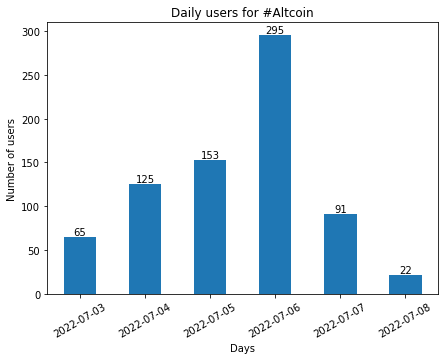

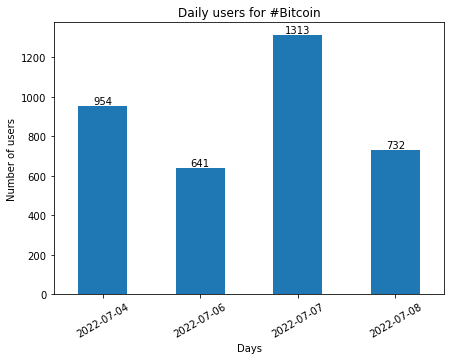

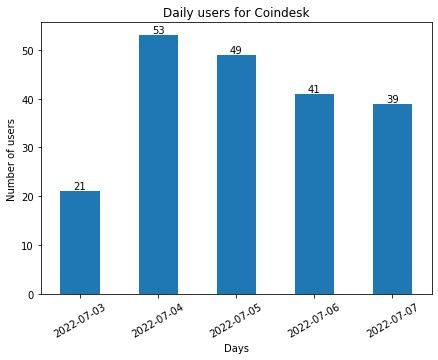

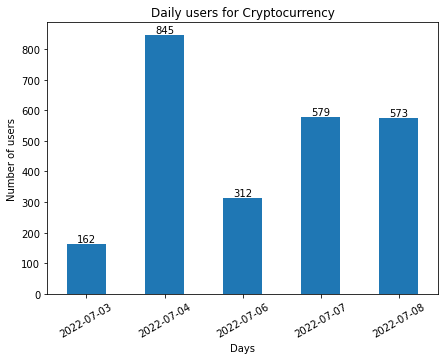

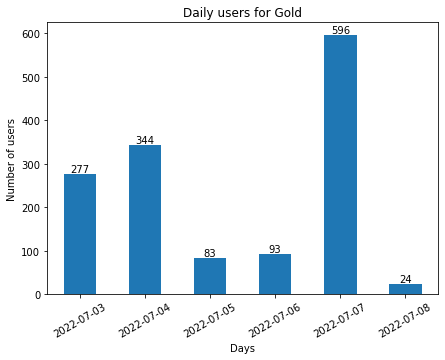

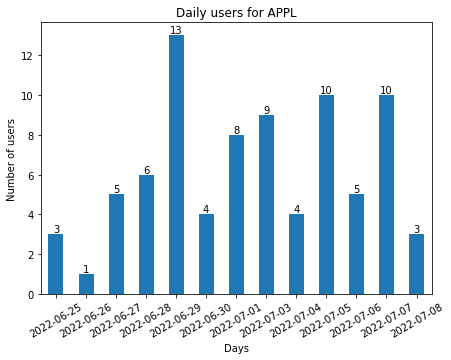

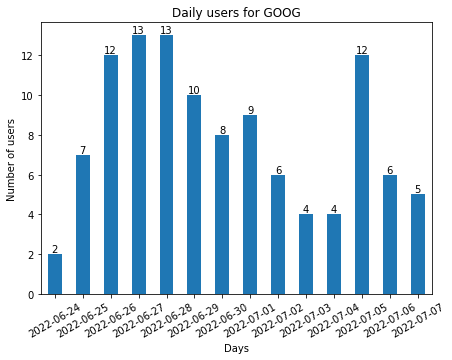

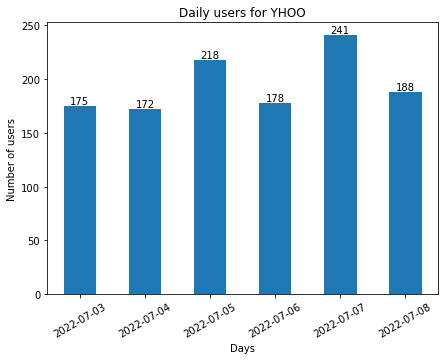

In [17]:
# Plotting the number of daily users for all 8 available dataframe
key_value = [['#Altcoin',Altcoin_df],['#Bitcoin',Bitcoin_df],['Coindesk',Coindesk_df],['Cryptocurrency',Cryptocurrency_df],['Gold',Gold_df],['APPL',APPL_df],['GOOG',GOOG_df],['YHOO',YHOO_df]]
for i in range(0,8):
    dailyUsers(key_value[i][0],key_value[i][1])